### Investment Case Study - Tim Kumar M B

First part of the case study is to setup the required libraries and data

In [1]:
####Import the required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

In [2]:
####Import Companies dataset...ANSI encoding works fine with the provided dataset in windows machine...
####with other encoding schemes there is a little discrepancy
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ANSI")
companies.head()
#companies.to_csv("cos.csv", encoding="ANSI")

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
####Import rounds2 dataset...
rounds2 = pd.read_csv("rounds2.csv",encoding = "ANSI")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
####As some unique keys are in lowercase and some in uppercase and to avoid merging issues going forward
####convert to lowercase for uniformity
def toLowerCase(x):
    return(x.lower())

companies['permalink']=companies['permalink'].apply(toLowerCase)
rounds2['company_permalink']=rounds2['company_permalink'].apply(toLowerCase)
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
####Investigating the quality of data in rounds2 dataset
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


###### Now that we have the data imported lets do some sanity checks on it

# Checkpoint 1 - Sanity Checks

### How many unique companies are present in rounds2?

In [7]:
rounds2['company_permalink'].nunique()

66368

### How many unique companies are present in the companies file?

In [8]:
companies['permalink'].nunique()

66368

### In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.

In [9]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


### Are there any companies in the rounds2 file which are not  present in companies ?

In [10]:
merged=pd.merge(rounds2, companies, how='left', left_on = 'company_permalink', right_on = 'permalink',indicator=True)
merged[merged['_merge'] =='left_only'].size

0

### Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [11]:
master_frame=pd.merge(rounds2, companies, how='inner', left_on = 'company_permalink', right_on = 'permalink')
master_frame.shape

(114949, 16)

In [12]:
#master_frame.to_csv("master.csv", encoding="ANSI")

In [13]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


###### Now that we have created a master datafarme from companies and funding dataset, we will go  ahead and perform some data cleansing activities

# Checkpoint 2 - Best Funding Type

#### Data Cleansing - for funding analysis let's filter out the rows that doesn't have funding type and amount value .... for other places where data is unavailble, we will make them as "Not Available"

In [14]:
####Keeping only the required columns for further analysis
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [15]:
####Removing rows where amount is not present
master_frame=master_frame[~np.isnan(master_frame['raised_amount_usd'])]
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          94959 non-null object
funding_round_permalink    94959 non-null object
funding_round_type         94959 non-null object
funding_round_code         28169 non-null object
funded_at                  94959 non-null object
raised_amount_usd          94959 non-null float64
permalink                  94959 non-null object
name                       94958 non-null object
homepage_url               90627 non-null object
category_list              93915 non-null object
status                     94959 non-null object
country_code               89108 non-null object
state_code                 87355 non-null object
region                     87911 non-null object
city                       87914 non-null object
founded_at                 78993 non-null object
dtypes: float64(1), object(15)
memory usage: 12.3+ MB


In [16]:
####Keep only the required data
####Mark "Not Available" where data is not provided...used in filtering clause going forward
master_frame=master_frame[['company_permalink','funding_round_permalink','funding_round_type',
                           'raised_amount_usd','name','homepage_url','category_list',
                           'status','country_code','city']]
master_frame.loc[master_frame.name.isnull(),'name']='Not Available'
master_frame.loc[master_frame.homepage_url.isnull(),'homepage_url']='Not Available'
master_frame.loc[master_frame.category_list.isnull(),'category_list']='Not Available'
master_frame.loc[master_frame.country_code.isnull(),'country_code']='Not Available'
master_frame.loc[master_frame.city.isnull(),'city']='Not Available'
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 10 columns):
company_permalink          94959 non-null object
funding_round_permalink    94959 non-null object
funding_round_type         94959 non-null object
raised_amount_usd          94959 non-null float64
name                       94959 non-null object
homepage_url               94959 non-null object
category_list              94959 non-null object
status                     94959 non-null object
country_code               94959 non-null object
city                       94959 non-null object
dtypes: float64(1), object(9)
memory usage: 8.0+ MB


##### Lets now calculate the average amount in each funding type as we are constrainted with 5-15 M USD per round of investment

### Average funding amount 

In [17]:
master_frame.head(5)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,http://livfame.com,Media,operating,IND,Mumbai
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,Delaware City
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,Not Available,Not Available
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,Beijing
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,Hong Kong


In [18]:
####Grouping by funding round type
df_by_funding = master_frame.groupby('funding_round_type')
df_by_funding['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4860.0,9.586945e+05,7.404397e+06,0.0,150000.00,400000.0,1000000.0,4.945120e+08
convertible_note,1447.0,1.453439e+06,8.043846e+06,0.0,78847.50,272000.0,1000000.0,1.850483e+08
debt_financing,6682.0,1.704353e+07,2.803204e+08,0.0,330484.25,1100000.0,4000000.0,2.127194e+10
equity_crowdfunding,1228.0,5.383682e+05,1.719329e+06,0.0,7000.00,100000.0,395901.0,2.740000e+07
grant,2124.0,4.300576e+06,2.558742e+07,0.0,50000.00,201684.0,1700000.0,7.500000e+08
non_equity_assistance,73.0,4.112031e+05,1.771747e+06,0.0,25000.00,60000.0,125000.0,1.500000e+07
post_ipo_debt,152.0,1.687046e+08,6.024738e+08,70000.0,4000000.00,19950000.0,60000000.0,5.800000e+09
post_ipo_equity,628.0,8.218249e+07,4.691889e+08,77.0,3764794.00,12262852.5,40000000.0,1.066494e+10
private_equity,1936.0,7.330859e+07,1.981135e+08,0.0,5000000.00,20000000.0,75000000.0,4.745460e+09


In [19]:
####Finding avg funding amount for funding types and filter based on the required types
filteredDF=pd.DataFrame(df_by_funding['raised_amount_usd'].mean())
filteredDF.loc[['venture','angel','seed','private_equity'],:]

,raised_amount_usd
funding_round_type,
venture,1.174895e+07
angel,9.586945e+05
seed,7.198180e+05
private_equity,7.330859e+07


In [20]:
####Filtering based on the investment criteria amount between 5 and 15 million
filteredDF[(filteredDF.raised_amount_usd >= 5000000 ) & (filteredDF.raised_amount_usd <= 15000000 )]

,raised_amount_usd
funding_round_type,
venture,1.174895e+07


In [21]:
####Looks like venture funding fits our investment criteria
####Filter only venture funding data
master_frame=master_frame[master_frame['funding_round_type']=='venture']
master_frame.shape

(50228, 10)

##### Based on the above results its clear that Venture funding is the suitable most type for us. So accordingly we are keeping only the venture funding data going forward and continue our analysis in finding most investment friendly countries

# Checkpoint 3 - Top English speaking Heavily invested Countries 

#### Data Cleansing - Since are performing country analysis, lets remove the rows that doesnt have country information 

In [22]:
####For country analysis
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50228 entries, 0 to 114941
Data columns (total 10 columns):
company_permalink          50228 non-null object
funding_round_permalink    50228 non-null object
funding_round_type         50228 non-null object
raised_amount_usd          50228 non-null float64
name                       50228 non-null object
homepage_url               50228 non-null object
category_list              50228 non-null object
status                     50228 non-null object
country_code               50228 non-null object
city                       50228 non-null object
dtypes: float64(1), object(9)
memory usage: 4.2+ MB


In [23]:
####Since our investment criteria involves country as well, lets filter data where the country is mentioned
master_frame=master_frame[~(master_frame.country_code=='Not Available')]
#master_frame.dropna(subset=['country_code'], inplace=True)
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48111 entries, 0 to 114941
Data columns (total 10 columns):
company_permalink          48111 non-null object
funding_round_permalink    48111 non-null object
funding_round_type         48111 non-null object
raised_amount_usd          48111 non-null float64
name                       48111 non-null object
homepage_url               48111 non-null object
category_list              48111 non-null object
status                     48111 non-null object
country_code               48111 non-null object
city                       48111 non-null object
dtypes: float64(1), object(9)
memory usage: 4.0+ MB


In [24]:
####Filtering top nine countries which have received the highest total funding 
top9=master_frame.groupby('country_code').sum().sort_values(by='raised_amount_usd',ascending=False).head(9)
top9=top9.reset_index()
top9['raised_amount_usd']=top9['raised_amount_usd']/1000000000
top9.rename(columns={'raised_amount_usd':'amount(Billions)'}, inplace=True)
top9

,country_code,amount(Billions)
0,USA,422.510843
1,CHN,39.835419
2,GBR,20.245627
3,IND,14.391859
4,CAN,9.583332
5,FRA,7.259537
6,ISR,6.907515
7,DEU,6.346960
8,JPN,3.363677


In [25]:
####Data containing top three most English speaking investment-friendly countries
master_frame=master_frame[master_frame['country_code'].isin(['USA','GBR','IND'])]

##### Based on our overall strategy to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing',we have identified the top 3 English speaking countries. For further analysis we have filtered data based on Venture funding and the top 3 English speaking countries to find out the best performing sectors in the selected countries


# Checkpoint 4 - Sector analysis

#### Data Cleansing - Since there are lot of primary sectors, we will map them to their main sectors and continue our analysis on that

In [26]:
####For sector analysis
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39018 entries, 0 to 114936
Data columns (total 10 columns):
company_permalink          39018 non-null object
funding_round_permalink    39018 non-null object
funding_round_type         39018 non-null object
raised_amount_usd          39018 non-null float64
name                       39018 non-null object
homepage_url               39018 non-null object
category_list              39018 non-null object
status                     39018 non-null object
country_code               39018 non-null object
city                       39018 non-null object
dtypes: float64(1), object(9)
memory usage: 3.3+ MB


In [27]:
####As per business rule, first string before the vertical bar will be considered the primary sector
master_frame['category_list']=master_frame['category_list'].astype(str)
master_frame['category_list']=master_frame['category_list'].apply(lambda x:x.split("|")[0])
master_frame['category_list']=master_frame['category_list'].apply(toLowerCase)

In [28]:
####Loading mapping data and check if unwanted data is present
mappings = pd.read_csv("mapping.csv")
print(mappings.head(2))
print("Sum->", mappings.Blanks.sum())

  category_list  Automotive & Sports  Blanks  Cleantech / Semiconductors  \
0           NaN                    0       1                           0   
1            3D                    0       0                           0   

   Entertainment  Health  Manufacturing  News, Search and Messaging  Others  \
0              0       0              0                           0       0   
1              0       0              1                           0       0   

   Social, Finance, Analytics, Advertising  
0                                        0  
1                                        0  
Sum-> 1


In [29]:
####Remove unwanted data....i.e Blanks column and NaN in category_list
####Convert to lowercase for uniformity before merging
mappings.dropna(inplace=True)
mappings.drop('Blanks', axis=1, inplace=True)
mappings['category_list']=mappings['category_list'].apply(toLowerCase)
mappings.head(5)

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,1,0,0,0,0


In [30]:
####Check for characters that might be invalid in the category(0123456789!@#%^*)
####Collect the information in a separate set
verifyCategoryWordsinMasterSet=set()
verifyCategoryWordsinMappingSet=set()
import re
numRegex=re.compile(r'[0123456789!@#%^*]')


def verifyWords(category,s):
    global numRegex
    if (numRegex.search(category)):
        s.add(category)
    return category

master_frame['category_list'].apply(lambda x: verifyWords(x,verifyCategoryWordsinMasterSet))
mappings['category_list'].apply(lambda x: verifyWords(x,verifyCategoryWordsinMappingSet))
print("In Master->" ,verifyCategoryWordsinMasterSet)
print("======================================================================================================")
print("In Mappings->", verifyCategoryWordsinMappingSet)

In Master-> {'3d printing', 'm2m', 'enterprise 2.0', 'b2b', '3d', '3d technology', 'p2p money transfer'}
In Mappings-> {'a0lytics', 'supply chain ma0gement', 'career ma0gement', 'm2m', 'can0bis', 'jour0lism', 'medical professio0ls', 'energy ma0gement', '0tural resources', '3d', 'it ma0gement', '0vigation', 'mobile a0lytics', 'fi0nce technology', '0tural language processing', '3d printing', 'fleet ma0gement', 'perso0lization', 'project ma0gement', 'k-12 education', 'b2b', 'gover0nce', 'identity ma0gement', 'innovation ma0gement', 'digital rights ma0gement', 'perso0l data', 'educatio0l games', 'professio0l networking', 'investment ma0gement', 'digital sig0ge', 'veteri0ry', 'fi0ncial exchanges', 'business a0lytics', 'enterprise 2.0', 'social media ma0gement', 'intellectual asset ma0gement', 'fi0nce', 'event ma0gement', 'lead ma0gement', 'big data a0lytics', '0notechnology', 'contact ma0gement', 'knowledge ma0gement', 'chi0 internet', 'alter0tive medicine', 'risk ma0gement', 'professio0l s

In [31]:
####In lot of categories 'na' has been replaced with '0'....Lets correct that
####Convert the dummy variables back into a separate column
mappings['category_list']=mappings['category_list'].str.replace('0','na')
mappings['main_sector'] = mappings.iloc[:,1:9].idxmax(axis=1)
mappings.head(5)
#mappings.to_csv("mappingscheck.csv", encoding="ANSI")

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
1,3d,0,0,0,0,1,0,0,0,Manufacturing
2,3d printing,0,0,0,0,1,0,0,0,Manufacturing
3,3d technology,0,0,0,0,1,0,0,0,Manufacturing
4,accounting,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
5,active lifestyle,0,0,0,1,0,0,0,0,Health


In [32]:
####Keep only the required columns
mappings=mappings[['category_list','main_sector']]
mappings.head()

,category_list,main_sector
1,3d,Manufacturing
2,3d printing,Manufacturing
3,3d technology,Manufacturing
4,accounting,"Social, Finance, Analytics, Advertising"
5,active lifestyle,Health


In [33]:
####Look for any further discrepancies if the main_sector is merged with master dataframe
master_frame1=pd.merge(master_frame, mappings, how='left', on = 'category_list', indicator=True)
master_frame1=master_frame1[master_frame1['_merge'] !='both']
by_category=master_frame1.groupby(['category_list'])
by_category.category_list.count()

category_list
adaptive equipment                   2
biotechnology and semiconductor      1
enterprise 2.0                       4
greentech                            1
natural gas uses                     1
not available                      215
product search                       1
racing                               1
rapidly expanding                    1
retirement                           2
specialty retail                     1
Name: category_list, dtype: int64

In [34]:
####Barring the "Not Available" records, only few of them are not mapped to its main_sector.
####Merge the main_sector into the master dataframe on inner join in order to filter above discrepancies
master_frame=pd.merge(master_frame, mappings, how='inner', on = 'category_list')
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 11 columns):
company_permalink          38788 non-null object
funding_round_permalink    38788 non-null object
funding_round_type         38788 non-null object
raised_amount_usd          38788 non-null float64
name                       38788 non-null object
homepage_url               38788 non-null object
category_list              38788 non-null object
status                     38788 non-null object
country_code               38788 non-null object
city                       38788 non-null object
main_sector                38788 non-null object
dtypes: float64(1), object(10)
memory usage: 3.6+ MB


##### Now the master dataframe contains both primary and main sectors. We can continue our analysis with the best performing main sector  

# Checkpoint 5 - Best Sectors in the top 3 contries

In [35]:
####Preferred funding by Spark Funds is 5 to 15 million USD.So lets filter based on the investment amt
####Create DataFrames D1,D2,D3 corresponding to top3 investment friendly countries

D1=master_frame[(master_frame.country_code=='USA') & 
                (master_frame.raised_amount_usd>=5000000) &
                (master_frame.raised_amount_usd<= 15000000)]

D2=master_frame[(master_frame.country_code=='GBR') & 
                (master_frame.raised_amount_usd>=5000000) &
                (master_frame.raised_amount_usd<= 15000000)]

D3=master_frame[(master_frame.country_code=='IND') & 
                (master_frame.raised_amount_usd>=5000000) &
                (master_frame.raised_amount_usd<= 15000000)]

####include total number of investments - total_number, for each main sector in separate column
####include total amount invested in each main sector - total_amount, in a separate column

number1=D1.groupby('main_sector')["raised_amount_usd"].agg([("total_number",'count'),
                                                            ("total_amount",'sum')]).reset_index()
D1 = pd.merge(D1,number1,on='main_sector')

number2=D2.groupby('main_sector')["raised_amount_usd"].agg([("total_number",'count'),
                                                            ("total_amount",'sum')]).reset_index()
D2 = pd.merge(D2,number2,on='main_sector')

number3=D3.groupby('main_sector')["raised_amount_usd"].agg([("total_number",'count'),
                                                            ("total_amount",'sum')]).reset_index()
D3 = pd.merge(D3,number3,on='main_sector')

In [36]:
#D1['total_number'] = D1.groupby('main_sector')['raised_amount_usd'].transform('count')
#D1['total_amount'] = D1.groupby('main_sector')['raised_amount_usd'].transform('sum')
#D2['total_number'] = D2.groupby('main_sector')['raised_amount_usd'].transform('count')
#D2['total_amount'] = D2.groupby('main_sector')['raised_amount_usd'].transform('sum')
#D3['total_number'] = D3.groupby('main_sector')['raised_amount_usd'].transform('count')
#D3['total_amount'] = D3.groupby('main_sector')['raised_amount_usd'].transform('sum')
D1.head(5)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,homepage_url,category_list,status,country_code,city,main_sector,total_number,total_amount
0,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.0,All Def Digital,http://alldefdigital.com,media,operating,USA,Los Angeles,Entertainment,591,5.099198e+09
1,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,5000000.0,ChefsFeed,http://www.chefsfeed.com,media,operating,USA,San Francisco,Entertainment,591,5.099198e+09
2,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,5000000.0,The Huffington Post,http://www.huffingtonpost.com,media,acquired,USA,New York,Entertainment,591,5.099198e+09
3,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,5000000.0,The Huffington Post,http://www.huffingtonpost.com,media,acquired,USA,New York,Entertainment,591,5.099198e+09
4,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,10000000.0,MatchMine,http://matchmine.com,media,closed,USA,Needham,Entertainment,591,5.099198e+09


##### Country1 Analysis

In [37]:
####Printing out results for USA
print(D1.groupby('main_sector')['total_number'].unique().sort_values(ascending=False))
#print(D1.groupby('main_sector')['total_amount'].unique().sort_values(ascending=False))
print("Total number of Investments---->",D1.groupby('main_sector')['total_number'].unique().sum())
print("Total Investment(USD)--->", D1['raised_amount_usd'].sum())

main_sector
Others                                     [2950]
Social, Finance, Analytics, Advertising    [2714]
Cleantech / Semiconductors                 [2350]
News, Search and Messaging                 [1583]
Health                                      [909]
Manufacturing                               [799]
Entertainment                               [591]
Automotive & Sports                         [167]
Name: total_number, dtype: object
Total number of Investments----> [12063]
Total Investment(USD)---> 107757097294.0


In [38]:
####For top sector count-wise, which company received the highest investment
print((D1[D1.main_sector=='Others']).groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(1))

company_permalink          name       
/organization/virtustream  Virtustream    64300000.0
Name: raised_amount_usd, dtype: float64


In [39]:
####For Second best sector count-wise, which company received the highest investment
print((D1[D1.main_sector=='Social, Finance, Analytics, Advertising']).groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(1))

company_permalink          name                           
/organization/shotspotter  SST Inc. (Formerly ShotSpotter)    67933006.0
Name: raised_amount_usd, dtype: float64


##### Country2 Analysis

In [40]:
####Printing out results for Great Britain
print(D2.groupby('main_sector')['total_number'].unique().sort_values(ascending=False))
#print(D2.groupby('main_sector')['total_amount'].unique().sort_values(ascending=False))
print("Total number of Investments---->",D2.groupby('main_sector')['total_number'].unique().sum())
print("Total Investment(USD)--->", D2['raised_amount_usd'].sum())

main_sector
Others                                     [147]
Social, Finance, Analytics, Advertising    [133]
Cleantech / Semiconductors                 [130]
News, Search and Messaging                  [73]
Entertainment                               [56]
Manufacturing                               [42]
Health                                      [24]
Automotive & Sports                         [16]
Name: total_number, dtype: object
Total number of Investments----> [621]
Total Investment(USD)---> 5379078691.0


In [41]:
####For top sector count-wise, which company received the highest investment
print((D2[D2.main_sector=='Others']).groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(1))

company_permalink             name          
/organization/electric-cloud  Electric Cloud    37000000.0
Name: raised_amount_usd, dtype: float64


In [42]:
####For Second best sector count-wise, which company received the highest investment
print((D2[D2.main_sector=='Social, Finance, Analytics, Advertising']).groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(1))

company_permalink                    name                 
/organization/celltick-technologies  Celltick Technologies    37500000.0
Name: raised_amount_usd, dtype: float64


##### Country 3 Analysis

In [43]:
####Printing out results for India
print(D3.groupby('main_sector')['total_number'].unique().sort_values(ascending=False))
#print(D3.groupby('main_sector')['total_amount'].unique().sort_values(ascending=False))
print("Total number of Investments---->",D3.groupby('main_sector')['total_number'].unique().sum())
print("Total Investment(USD)--->", D3['raised_amount_usd'].sum())

main_sector
Others                                     [110]
Social, Finance, Analytics, Advertising     [60]
News, Search and Messaging                  [52]
Entertainment                               [33]
Manufacturing                               [21]
Cleantech / Semiconductors                  [20]
Health                                      [19]
Automotive & Sports                         [13]
Name: total_number, dtype: object
Total number of Investments----> [328]
Total Investment(USD)---> 2949543602.0


In [44]:
####For top sector count-wise, which company received the highest investment
print((D3[D3.main_sector=='Others']).groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(1))

company_permalink           name        
/organization/firstcry-com  FirstCry.com    39000000.0
Name: raised_amount_usd, dtype: float64


In [45]:
####For Second best sector count-wise, which company received the highest investment
print((D3[D3.main_sector=='Social, Finance, Analytics, Advertising']).groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(1))

company_permalink              name           
/organization/manthan-systems  Manthan Systems    50700000.0
Name: raised_amount_usd, dtype: float64


# Checkpoint 6 - Results and Plots

#### A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [46]:
####Create a new dataframe to store plotting information
selected_funds=df_by_funding['raised_amount_usd'].agg(['sum','mean']).reset_index()
selected_funds['investment_fraction(%)']=(selected_funds['sum']/np.sum(selected_funds['sum']))*100
selected_funds=selected_funds[selected_funds['funding_round_type'].isin(['angel','seed','private_equity','venture'])]
selected_funds['average(millions)']=selected_funds['mean']/1000000
selected_funds=selected_funds.sort_values(by='average(millions)',ascending=True)
selected_funds

,funding_round_type,sum,mean,investment_fraction(%),average(millions)
11,seed,1.698986e+10,7.198180e+05,1.715931,0.719818
0,angel,4.659255e+09,9.586945e+05,0.470572,0.958694
13,venture,5.901262e+11,1.174895e+07,59.601178,11.748949
8,private_equity,1.419254e+11,7.330859e+07,14.334092,73.308593


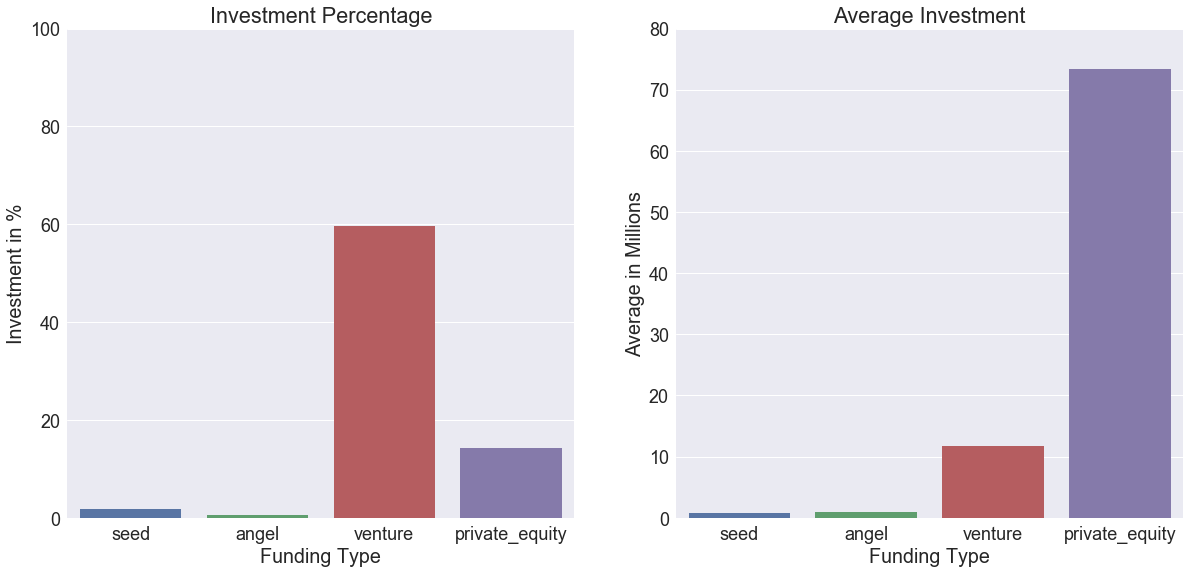

In [47]:
####Plot
####Adjust figure size
plt.figure(figsize=(20, 9))
sns.set(font_scale=1.8)

####Subplot 1: Investment Percentage across various funding types
plt.subplot(1, 2, 1)
p1=sns.barplot(x='funding_round_type', y='investment_fraction(%)', data=selected_funds)
p1.set(xlabel='Funding Type', ylabel='Investment in %')
plt.title("Investment Percentage")
plt.ylim([0,100])

####Subplot 2: Average Investment across various funding types
plt.subplot(1, 2, 2)
p2= sns.barplot(x='funding_round_type', y='average(millions)', data=selected_funds)
p2.set(xlabel='Funding Type', ylabel='Average in Millions')
plt.title("Average Investment")
plt.ylim([0,80])


plt.show()

##### Its clear that Venture funding is best suited funding type for our investments

#### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

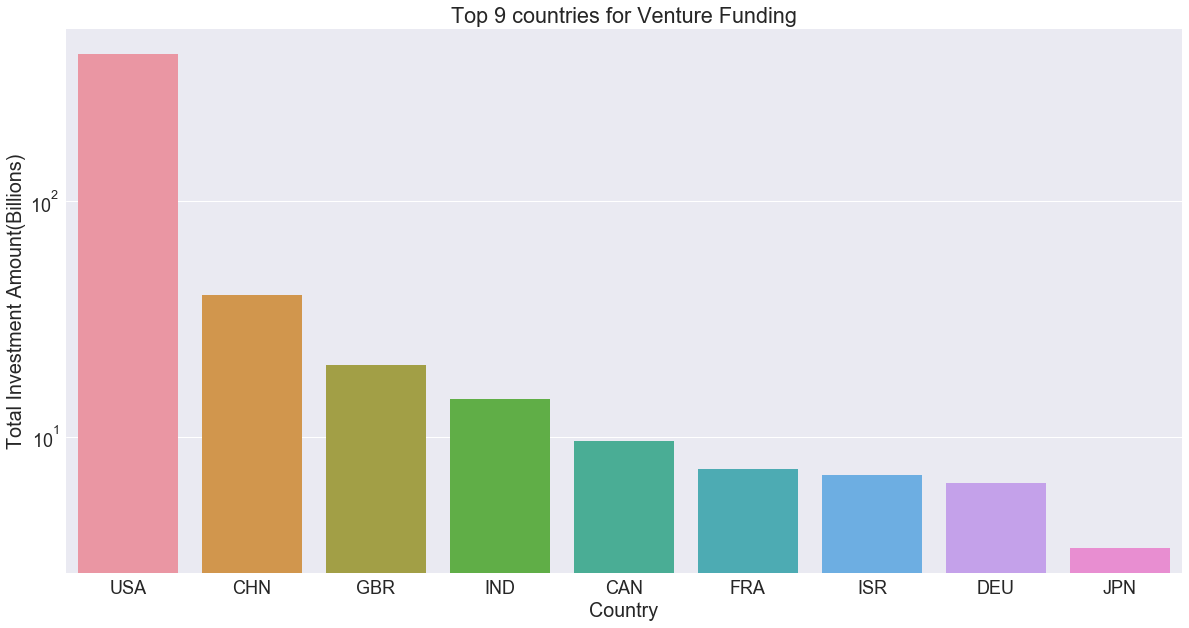

In [48]:
####Top 9 investment friendly countries
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.8)
p3=sns.barplot(x='country_code', y='amount(Billions)', data=top9, estimator=np.sum)
plt.yscale('log')
p3.set(xlabel='Country', ylabel='Total Investment Amount(Billions)')
plt.title("Top 9 countries for Venture Funding")
plt.show()

##### Top English speaking investment friendly countries are - United States, United Kingdom and India

### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

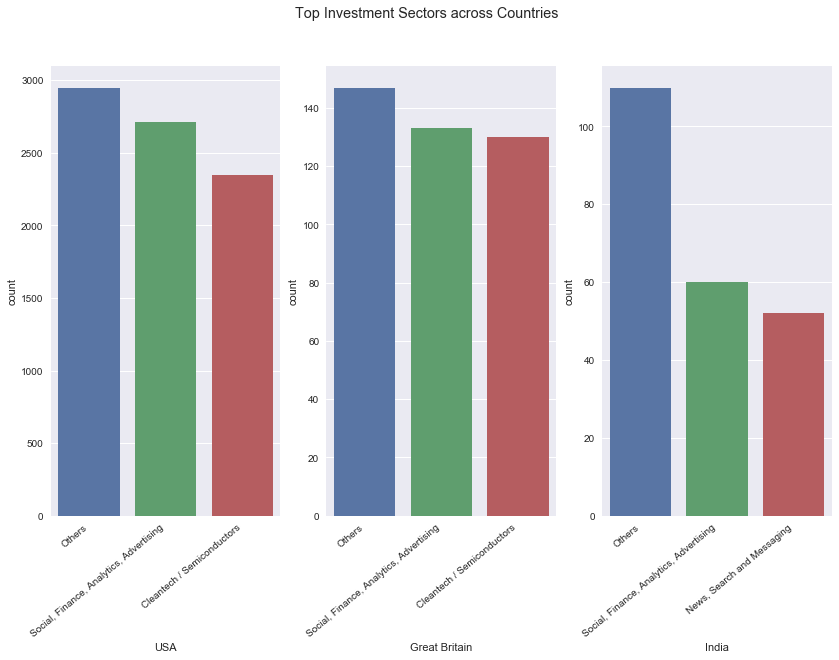

In [49]:
####Plot showing the number of investments in the top 3 sectors of the top 3 countries
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)

fig,ax=plt.subplots(1,3)
fig.set_size_inches(14, 8.27)
plt.suptitle("Top Investment Sectors across Countries ")


# No of investments in USA
s1=sns.countplot(D1['main_sector'], ax=ax[0],order=D1.main_sector.value_counts().iloc[:3].index)
s1.set_xticklabels(s1.get_xticklabels(), rotation=40, ha="right")
s1.set_xlabel("USA")

# No of investments in Great Britain
s2=sns.countplot(D2['main_sector'], ax=ax[1],order=D2.main_sector.value_counts().iloc[:3].index)
s2.set_xticklabels(s2.get_xticklabels(), rotation=40, ha="right")
s2.set_xlabel("Great Britain")

# No of investments in India
s3=sns.countplot(D3['main_sector'], ax=ax[2],order=D3.main_sector.value_counts().iloc[:3].index)
s3.set_xticklabels(s3.get_xticklabels(), rotation=40, ha="right")
s3.set_xlabel("India")

plt.show()

##### Its clear that the main sectors - "Others" and "Social, Finance, Analytics, Advertising" attract most invetsments

# Additional Analysis

#### Taking into account of operting status of companies before making final investment decision

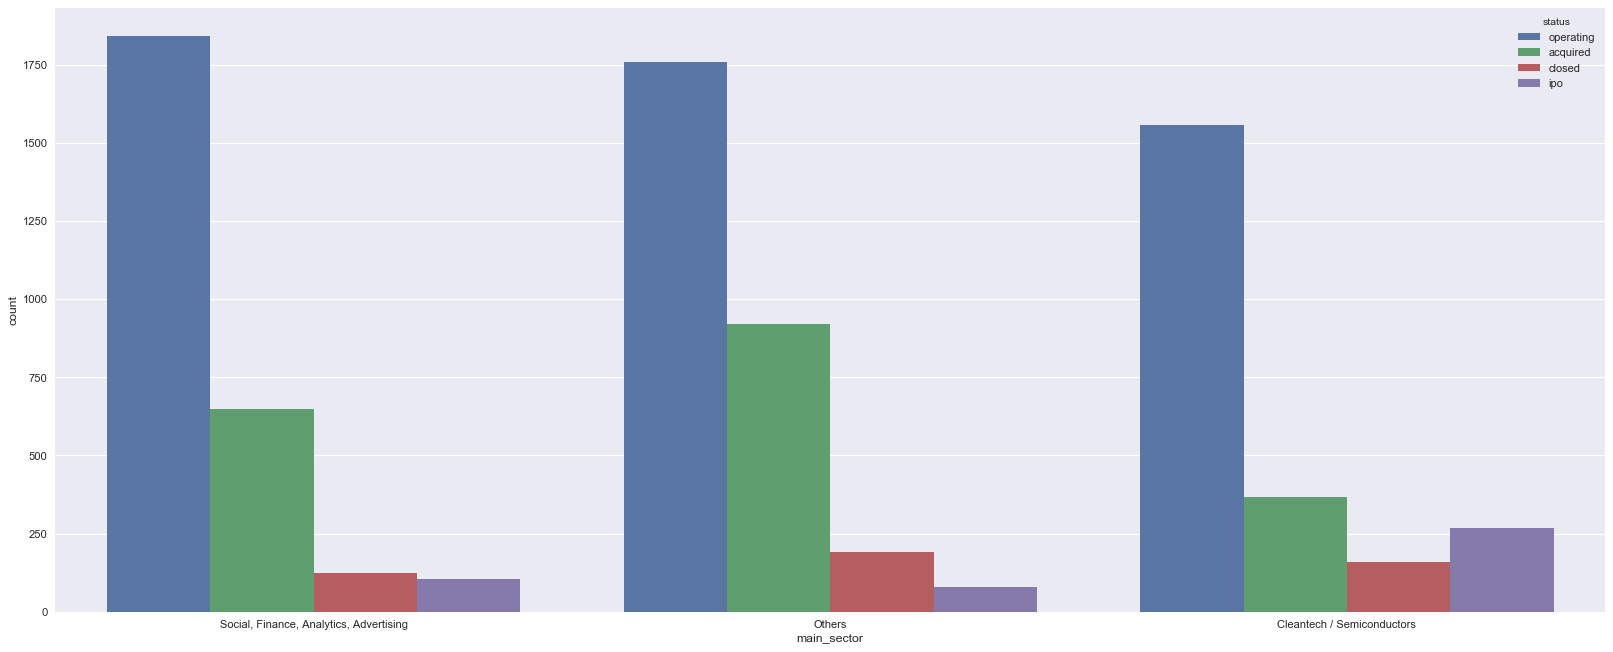

In [50]:
plt.figure(num=None, figsize=(25, 10), dpi=80)
sns.countplot(x=D1[D1.main_sector.isin(pd.Series((D1.main_sector.value_counts().iloc[:3]).index))].main_sector, 
            hue='status',data=D1)
plt.show()

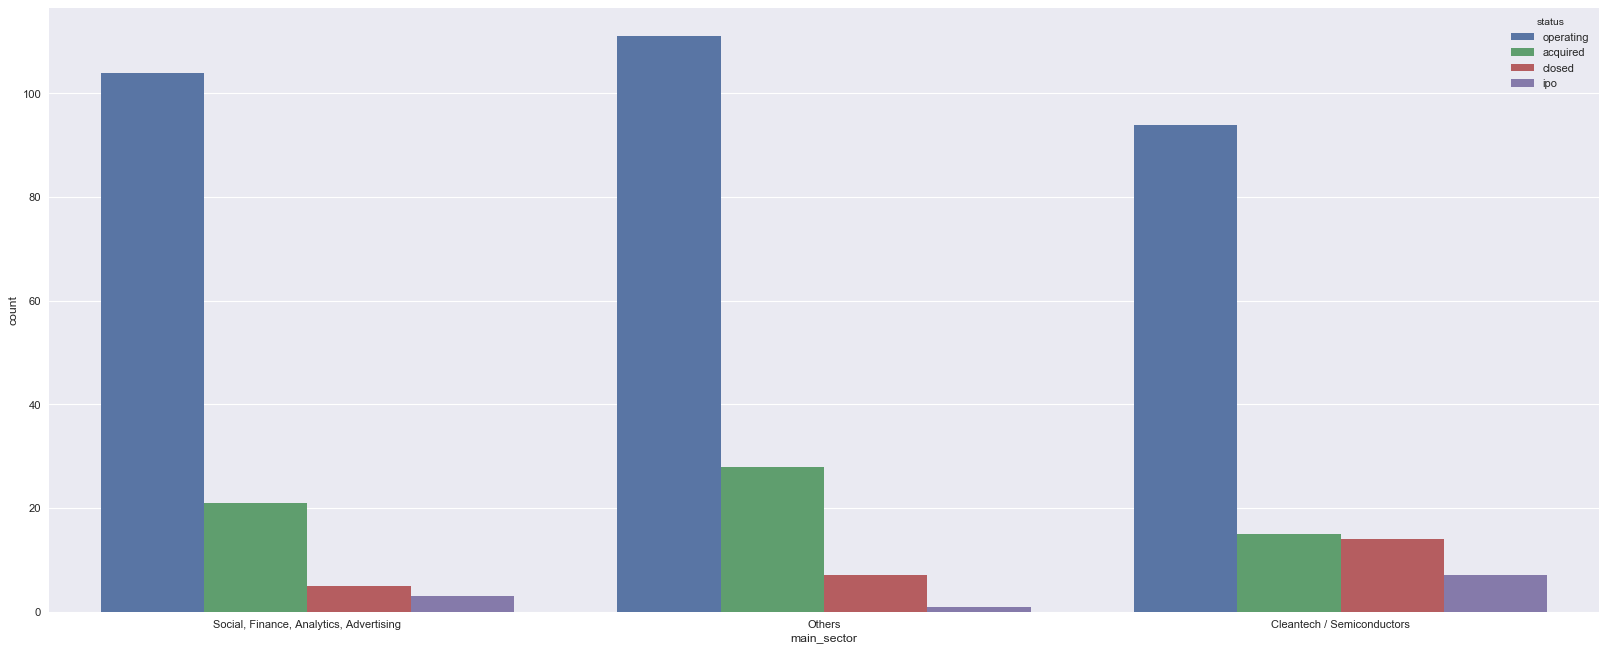

In [51]:
plt.figure(num=None, figsize=(25, 10), dpi=80)
sns.countplot(x=D2[D2.main_sector.isin(pd.Series((D2.main_sector.value_counts().iloc[:3]).index))].main_sector, 
            hue='status',data=D2)
plt.show()

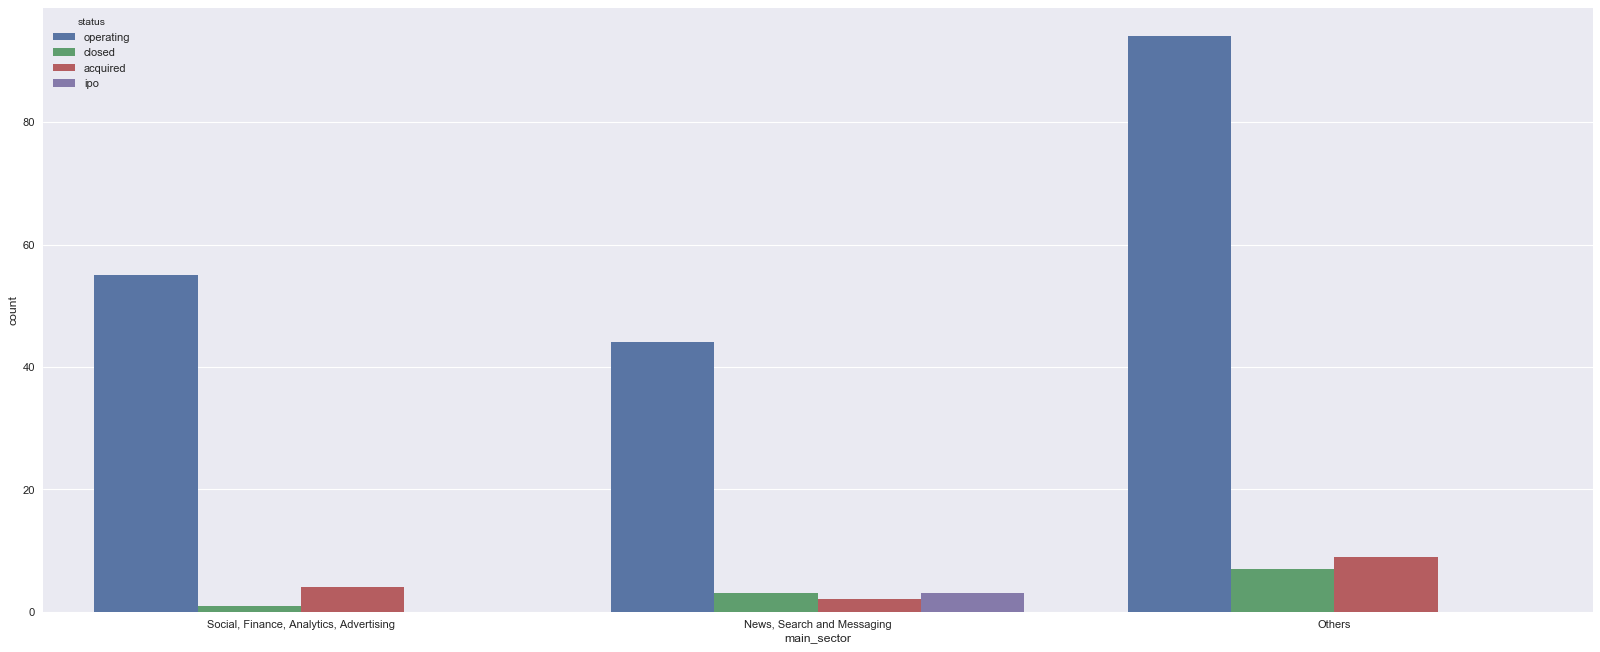

In [52]:
plt.figure(num=None, figsize=(25, 10), dpi=80)
sns.countplot(x=D3[D3.main_sector.isin(pd.Series((D3.main_sector.value_counts().iloc[:3]).index))].main_sector, 
            hue='status',data=D3)
plt.show()

##### Looks like the operting status of companies doesnt impact much of our investment decision

##### So it is conclusive that Venture funding is the most suitable investment for our case and the investment friendly countries are US, UK and India.
##### Recommendations:
##### USA looks the most investment friendly as per our requirements. So it is recommended to invest there in the sectors of Others(Software, technology etc..) and “Social, Finance, Analytics, Advertising”
##### Moreover in-order to split the portfolio, it is recommended to invest in “Cleantech / Semiconductors” in UK and “Others” sector in India
